In [1]:
from janome.tokenizer import Tokenizer

### Q.41 「茶の本」の文書からすべての名詞を抽出し、その出現頻度とともに表示せよ。

In [2]:
t = Tokenizer()
meisi = []
results = {}

with open('data/natural-language-processing/cha_no_hon.txt', encoding='utf-8') as f:
    s = f.read()
    data = t.tokenize(s)
    for token in data:
        lst = token.part_of_speech.split(',')
        if '名詞' in lst:
            meisi.append(token.surface)
    for word in meisi:
        if word in results:
            results[word] += 1
        else:
            results[word] = 1

# print(results)

### Q42. 「茶の本」の文書からすべてのサ変接続の名詞を抽出し、その出現頻度とともに表示せよ

In [3]:
def count_words(words):
    results = {}
    for word in words:
        if word in results:
            results[word] += 1
        else:
            results[word] = 1
    return results

def get_part_and_num(part):
    t = Tokenizer()
    words = list()
    with open('data/natural-language-processing/cha_no_hon.txt', encoding='utf-8') as f:
        s = f.read()
        for token in t.tokenize(s):
            lst = token.part_of_speech.split(',')
            if part in lst:
                words.append(token.surface)
    return count_words(words)

In [4]:
# get_part_and_num('サ変接続')

### Q43. 「茶の本」の文書から「形容詞+名詞」の形になっている句をすべて抽出し、表示せよ。

In [5]:
def get_janome_list(file_path):
    janome_list = list()
    with open(file_path, encoding='utf-8') as f:
        s = t.tokenize(f.read())
        for token in s:
            token_set = [token.surface, token.part_of_speech.split(',')]
            janome_list.append(token_set)
    return janome_list

In [6]:
def get_words_by_types(former, latter):
    lst = get_janome_list('data/natural-language-processing/cha_no_hon.txt')
    results = list()
    for i, token_set in enumerate(lst):
        if i == 0:
            pass
        else:
            if latter in token_set[1]:
                if former in lst[i-1][1]:
                    results.append(lst[i-1][0] + token_set[0])
    return results

In [7]:
get_words_by_types('形容詞', '名詞')

['美しきもの',
 'やさしい企て',
 '長い間',
 'ずるところ',
 '狭いもの',
 '早く涙',
 '悪いこと',
 'なく奉納',
 '血なまぐさい姿',
 '暖かい同情',
 'よき沈黙',
 '血なまぐさい戦争',
 'つまらない狂信',
 'おもしろい種',
 '遠きもの',
 '毛深いしっぽ',
 '悪いこと',
 '高いシルクハット',
 '嘆かわしいもの',
 '血なまぐさい戦争',
 '恐ろしい結果',
 'やわらかい気持ち',
 '弱い調和',
 '柔らかい絹',
 'なく確立',
 '疑わしい煎茶',
 '古い記事',
 'よい物',
 '高いため',
 'すばらしい勢い',
 'けだかい奥義',
 '広く天',
 'やましいこと',
 '明るい午後',
 'うれしげ',
 'はかないこと',
 'ないこと',
 'けだかい味',
 '悪いため',
 '早い時代',
 '広くこれ',
 '重い茶碗',
 '軽い白磁',
 '新しい方法',
 '偉い芸術',
 '珍しい良質',
 '新しい意味',
 '古い喫茶',
 '長い災禍',
 '強い興味',
 '若さ',
 '近い宇治',
 'ないよう',
 '新しい形',
 '著しいもの',
 '相容れない一種',
 '遠い以前',
 '長い間',
 '恐ろしく自己',
 '速く能',
 '等しく彼ら',
 '興味深い結果',
 '憂き世の中',
 '良注釈',
 '強く唱道',
 'もったいないこと',
 '等しい可能',
 '深いもの',
 '軽い務め',
 'ないよう',
 '美しさ',
 '広さ',
 'ない茶室',
 '狭い家',
 'よい茶室',
 '著しい対照',
 'ないもの',
 '大きさ',
 'がたいもの',
 '高さ',
 '古い宮殿',
 'なく装飾',
 '等しいよう',
 '偉い茶人',
 '多く反映',
 '広さ',
 '狭い室',
 '新しい感情',
 '偉いもの',
 '遠州',
 '遠州',
 'やわらかい霊光',
 '高さ',
 '狭い入り口',
 'ないよう',
 '美しい音',
 '遠き丘',
 '低いひさし',
 '古めかしい和',
 '新しい茶筅',
 '著しい対比',
 '暗いすみ',
 '重々しい木造',
 '古い考え',
 '深い意味'

### Q44. 「茶の本」の文書からすべての単語を抽出し、出現頻度が高い上位20件の単語（の原形）を、品詞名、頻度付きで表示せよ。

In [8]:
lst = get_janome_list('data/natural-language-processing/cha_no_hon.txt')
words = dict()

for item in lst:
    items = ','.join([item[0], item[1][0]])
    if items not in words:
        words[items] = 1
    else:
        words[items] += 1

sorted_words = sorted(words.items(), reverse=True, key=lambda x:x[1])
print(sorted_words[:20])


[('の,助詞', 1633), ('、,記号', 1135), ('は,助詞', 1078), ('に,助詞', 1043), ('を,助詞', 1027), ('。,記号', 1021), ('て,助詞', 756), ('た,助動詞', 615), ('が,助詞', 432), ('で,助動詞', 418), ('と,助詞', 410), ('な,助動詞', 255), ('し,動詞', 253), ('も,助詞', 248), ('いる,動詞', 237), ('ある,助動詞', 233), ('こと,名詞', 226), ('その,連体詞', 182), ('もの,名詞', 169), ('する,動詞', 162)]


### Q.45 「茶の本」の文書のすべての名詞を抽出し、単語の出現頻度のヒストグラムを表示せよ（言語処理100本ノック 2015 Q.38 より改題）。

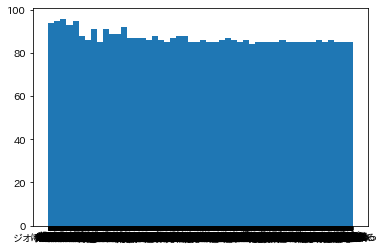

In [18]:
word = [item.split(',')[0] for item in list(words.keys())]
values = list(words.values())[:20]

import matplotlib.pyplot as plt
plt.hist(word, bins=50)
plt.show()

### Q.46 「茶の本」の文書の全単語を抽出し、単語の出現頻度順位を横軸、その出現頻度を縦軸する両対数グラフを表示せよ（言語処理100本ノック 2015 Q.39より改題）。

In [22]:
words = get_janome_list('data/natural-language-processing/cha_no_hon.txt')
words = [item[0] for item in words]

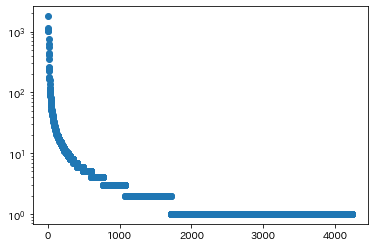

In [36]:
dct = count_words(words)
dct = dict(sorted(dct.items(), key=lambda x:x[1], reverse=True))
x = [i for i in range(1, len(dct)+1)]
y = dct.values()

plt.scatter(x, y)
plt.yscale("log")
plt.show()

### Q.47 「茶の本」の文書の文章を文に切り分けたものを、リストsentencesに格納せよ。さらに文の総数（リストsentencesの長さ）を求めよ。なお、切り分ける際、文に登場する空白文字、カギ括弧、および改行記号は除去せよ。

In [46]:
sentences = []
start_num = 0
end_num = 0

remove_list = ["\u3000", "「", "」", "\n", "|", "\n\n"]

format_words = [item for item in words if item not in remove_list]
for i, word in enumerate(format_words):
    end_num = i
    if "。" in word:
        sentences.append("".join(format_words[start_num:end_num+1]))
        start_num = end_num + 1

print(len(sentences))
        

1021


### Q.48 一般に文書は複数の文から構成される。ある単語が出現する文の数をsentence frequencyと呼ぶことにする。

「茶の本」の文書に出現する全名詞について、そのsentence frequencyを計算し、

単語の原形をキー、
sentence frequencyをバリュー
とする辞書形式で結果を表示せよ。

In [47]:
sentence_frequency = dict()

for word in format_words:
    for sentence in sentences:
        if word in sentence:
            if word not in sentence_frequency:
                sentence_frequency[word] = 1
            else:
                sentence_frequency[word] += 1
print(sentence_frequency)

{'第': 550, '一': 7656, '章': 224, '人情': 36, 'の': 1541256, '碗': 91, '茶': 26325, 'は': 868868, '薬用': 1, 'として': 1806, '始まり': 9, '後': 378, '飲料': 100, 'と': 243130, 'なる': 1710, '。': 1042441, 'シナ': 1184, 'において': 1978, '八': 121, '世紀': 1190, 'に': 789551, '高雅': 9, 'な': 137011, '遊び': 9, '一つ': 144, '詩歌': 9, '域': 35, '達し': 28, 'た': 373305, '十': 1360, '五': 240, '至り': 4, '日本': 810, 'これ': 7380, 'を': 652145, '高め': 4, 'て': 500472, '種': 140, '審美': 81, '的': 4347, '宗教': 121, '、': 735480, 'すなわち': 484, '茶道': 528, 'まで': 676, '進め': 1, '日常': 9, '生活': 144, '俗事': 1, '中': 2898, '存する': 80, '美しき': 1, 'もの': 26195, '崇拝': 132, 'する': 33372, 'こと': 44748, '基づく': 9, '一種': 42, '儀式': 169, 'で': 281680, 'あっ': 11440, '純粋': 4, '調和': 72, '相互': 1, '愛': 80, '神秘': 16, '社会': 110, '秩序': 4, 'ローマン': 4, '主義': 399, '諄々': 1, '教える': 9, 'ある': 111267, '要義': 1, '不完全': 16, 'いわゆる': 36, '人生': 361, 'という': 8514, 'この': 5184, '不可解': 1, 'うち': 42, '何': 483, 'か': 28875, '可能': 80, '成就': 1, 'しよ': 99, 'う': 46680, 'やさしい': 4, '企て': 16, 'から': 16188, '原理': 54, '普

### Q49. ある文の中に単語と単語が登場するとき、「とは共起する」と呼ぶことにする。また、文書中に単語と単語が登場する文がN個存在するとき、「との共起回数をN回」と定義する。

「茶の本」の文書の文章の中で単語「茶」と共起する名詞を抽出し、共起回数順（降順）に表示せよ。

In [70]:
def get_noun_in_sentence(term, sentence):
    t = Tokenizer()
    s = t.tokenize(sentence)
    words = list()
    for token in s:
        parts = token.part_of_speech.split(',')
        if "名詞" == parts[0]:
            words.append(token.surface)
    if term in words:
        return words
    else:
        return None

In [72]:
words = list()

for sentence in sentences:
    lst = get_noun_in_sentence("茶", sentence)
    if lst:
        words += lst
print(words)

['一', '章', '人情', '碗', '茶', '薬用', '始まり', '後', '飲料', '茶', '原理', '普通', '意味', '審美', '主義', '盆', '茶托', '微妙', '音', 'ごろ', '婦人', '絹', 'ずれ', '音', 'クリーム', '砂糖', '普通', '問答', '茶', '崇拝', '疑い', '確立', 'こと', 'ヨーロッパ', '茶', '記事', 'アラビヤ', '旅行', '者', '物語', '八', '七', '九', '年', '以後', '広東', '主要', '歳入', '財源', '塩', '茶', '税', 'マルコポーロ', 'シナ', '市', '舶司', '茶', '税', '勝手', 'ため', '一', '二', '八', '五', '年', '免職', 'こと', '記録', 'ジオヴァーニ・バティスタ・ラムージオ', 'エル', 'アルメイダ', 'マフェノ', 'タレイラ', 'ら', '旅行', '者', 'たち', '茶', 'こと', '一', '六', '一', '〇', '年', 'オランダ', '東', 'インド', '会社', '船', 'ヨーロッパ', '茶', '輸入', 'この世', 'すべて', '物', '茶', '普及', '反対', 'ヘンリー・セイヴィル', 'よう', '異端', '者', '茶', 'こと', '不潔', '習慣', '口', '非難', '茶', '男', '身', 'たけ', 'め', '女', '美', '茶', '価', 'ため', '初め', '一般', '人', '消費', '十', '八', '世紀', '前半', 'ロンドン', 'コーヒー', '店', '喫茶店', 'アディソン', 'スティール', 'よう', '文士', 'ところ', '茶', 'ら', '退屈', 'しのぎ', 'もの', 'これ', '関連', '現代', '歴史', '茶', '主要', '役', 'アメリカ', '植民', '地', '圧迫', '茶', '重税', '人間', '忍耐', '力', 'アメリカ', '独立', 'ボストン', '港', '茶', '箱', 'こと', '茶', '味', '微妙', '

In [73]:
dct = count_words(words)
dct = dict(sorted(dct.items(), key=lambda x: x[1], reverse=True))

In [74]:
dct

{'茶': 117,
 'こと': 22,
 'もの': 17,
 '一': 14,
 'の': 14,
 'よう': 11,
 '人': 11,
 'これ': 11,
 '章': 10,
 'シナ': 9,
 '理想': 9,
 '芸術': 9,
 '宋': 9,
 '彼': 9,
 '宗匠': 9,
 '葉': 8,
 'ため': 7,
 '二': 7,
 '三': 7,
 '的': 7,
 '碗': 6,
 '者': 6,
 '年': 6,
 'ら': 6,
 'ところ': 6,
 '時代': 6,
 '方': 6,
 '粉': 6,
 '彼ら': 5,
 '儀式': 5,
 '花': 5,
 '茶の湯': 5,
 '禅': 5,
 '普通': 4,
 'ヨーロッパ': 4,
 '八': 4,
 'たち': 4,
 '茶人': 4,
 'それ': 4,
 '——': 4,
 'それぞれ': 4,
 '唐': 4,
 '経': 4,
 '法': 4,
 '陸': 4,
 '羽': 4,
 '七': 3,
 '九': 3,
 '塩': 3,
 'すべて': 3,
 '十': 3,
 '力': 3,
 '味': 3,
 '立派': 3,
 '時期': 3,
 'いろいろ': 3,
 '流行': 3,
 '当時': 3,
 '違い': 3,
 '団': 3,
 '有名': 3,
 '影響': 3,
 'たて': 3,
 '沸': 3,
 '中': 3,
 '名': 3,
 '王': 3,
 '種': 3,
 '道教': 3,
 '僧': 3,
 '日本': 3,
 '宗教': 3,
 '飲料': 2,
 '意味': 2,
 '主義': 2,
 '微妙': 2,
 '音': 2,
 '崇拝': 2,
 '旅行': 2,
 '主要': 2,
 '税': 2,
 '五': 2,
 '〇': 2,
 '東': 2,
 '輸入': 2,
 '習慣': 2,
 '口': 2,
 '現代': 2,
 'アメリカ': 2,
 '化': 2,
 '西洋': 2,
 '芳香': 2,
 '酒': 2,
 '私': 2,
 '考え': 2,
 '家庭': 2,
 '流': 2,
 '品': 2,
 '名人': 2,
 '絵画': 2,
 '同様': 2,
 '流派': 2,
 '煎茶': 

### Q.50